## Report 1: Greedy heuristics

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245
* Alicja Kasicka, 148246

Source code: https://github.com/Oskshust/evo_comp/tree/main/1

#### PROBLEM DESCRIPTION:
In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to compare the paths created by two greedy heuristics that differ in the way they choose the next vertex to be added- nearest neighbor and greedy cycle and a random solution. We run each greedy method 200 times- each time we chose the different vertex as the starting node. For the random method, the starting vertex is chosen randomly in every iteration.

In [1]:
from scripts import *

print(get_dist_matrix("../data/TSPA.csv", True))

[[  inf 2032. 2098. ... 4159. 3783. 1514.]
 [1633.   inf 2398. ... 3349. 2266.  817.]
 [ 720. 1419.   inf ... 3640. 3149.  964.]
 ...
 [2782. 2371. 3641. ...   inf 2908. 2554.]
 [2558. 1440. 3302. ... 3060.   inf 1773.]
 [1234.  936. 2062. ... 3651. 2718.   inf]]


In [2]:
matrix = get_dist_matrix("../data/TSPA.csv", True)
sol, cost = random_solution(matrix)
print(sol, cost)

[142 100  47  79 181 187 163 109  76 131 167  52  43   0  96 141 186 112
 143  72  11  64 161 157  97  75  87  89 159 154  95 197 135  74  24  33
  51 118 108  32 110  17 174 164 111  59  73 139 130 113 162  69  36 107
 136  66  57  10 188  98  20 160  71 185  35  65 170  78   7 106  46   8
 151  40   3 124  34  23  16 199   5  63 180  38 115 153  13 155 120  84
 116  27 183 127 133  94  67  54   4  90] 274353.0


## RANDOM SOLUTION

#### PSEUDOCODE:

    function random_solution(dist_matrix, all_vertices):
        n <- round_up(number_of_all_vertices / 2)
        solution = []

        for i in range(n):
            random_vertex <- get_random(all_vertices)
            solution.append(random_vertex)
            all_vertices.remove(random_vertex)
        
        cost = 0
        for i in range(n):
            cost += dist_matrix[solution[i-1], solution[i]]
            

In [3]:
np.random.seed(123)

Best cost: 241153.0
Worst cost: 298242.0
Mean cost after 200 solutions: 264750.185


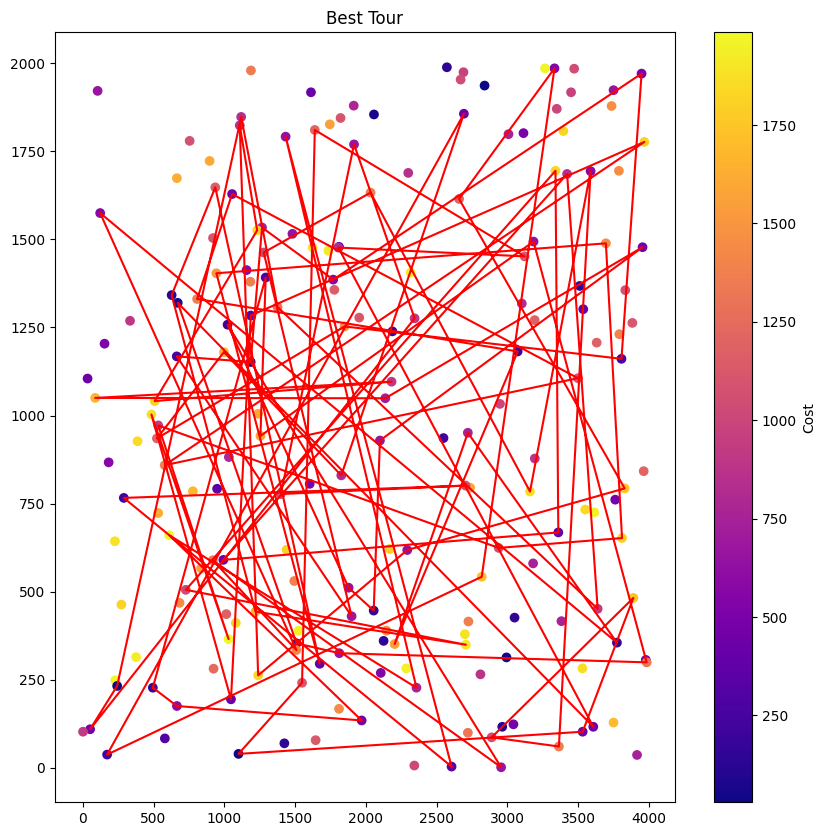

In [4]:
run_random_exp("../data/TSPA.csv")

Best cost: 240380.0
Worst cost: 296499.0
Mean cost after 200 solutions: 266304.945


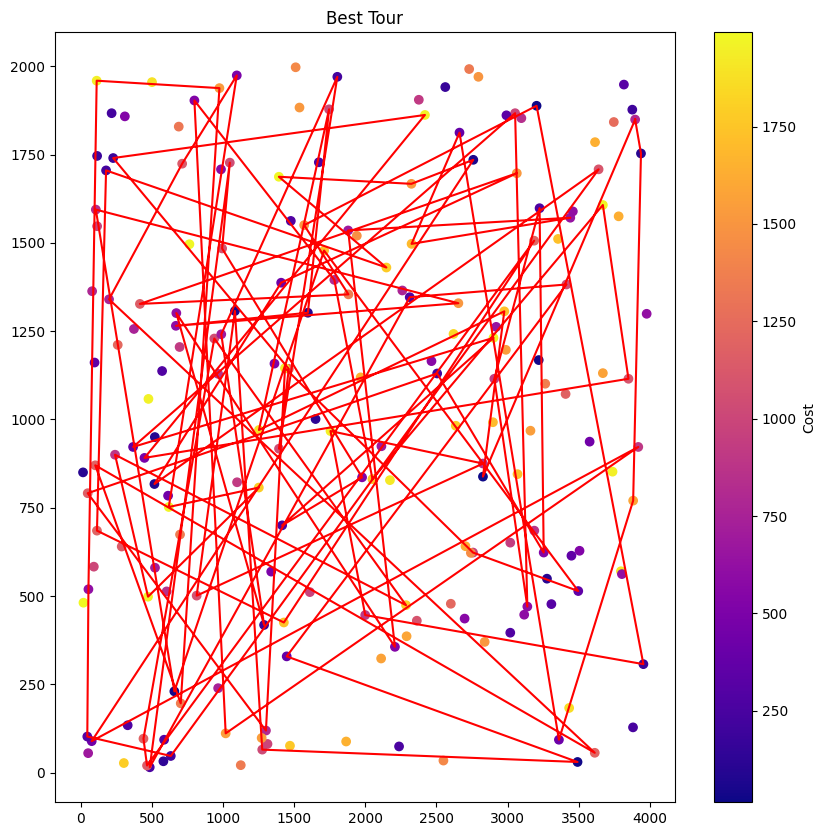

In [5]:
run_random_exp("../data/TSPB.csv")

Best cost: 188548.0
Worst cost: 239747.0
Mean cost after 200 solutions: 214950.675


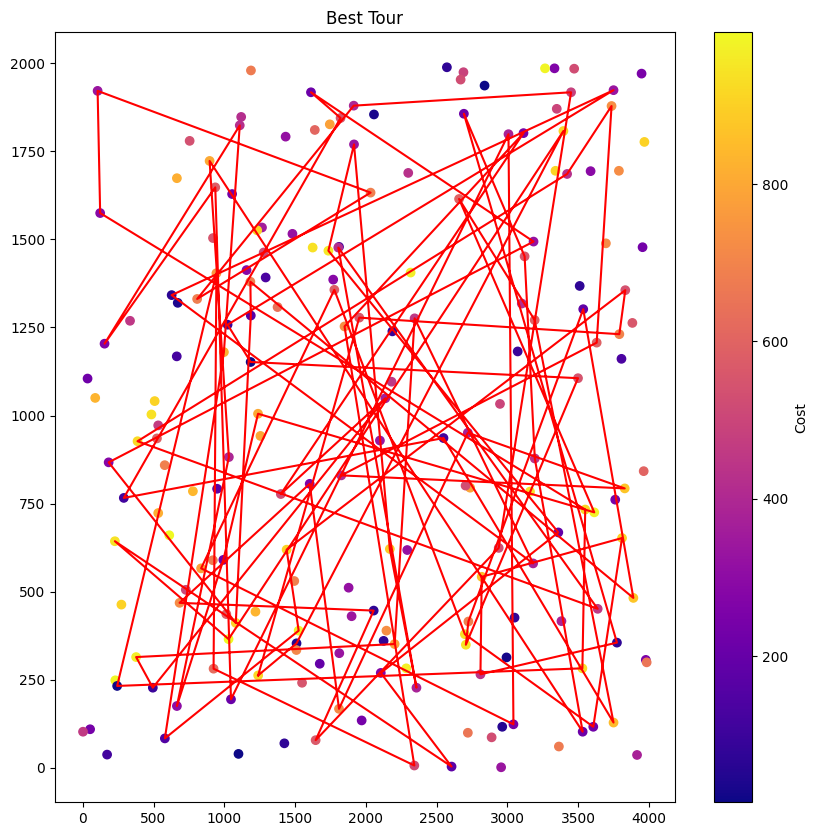

In [6]:
run_random_exp("../data/TSPC.csv")

Best cost: 194917.0
Worst cost: 246170.0
Mean cost after 200 solutions: 218555.1


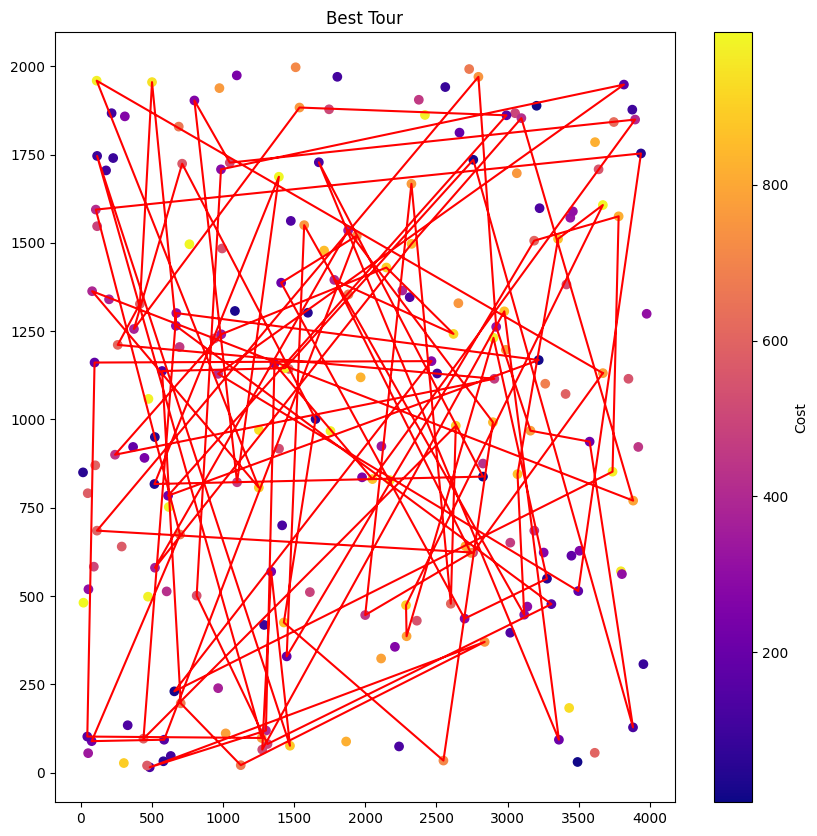

In [7]:
run_random_exp("../data/TSPD.csv")

## NEAREST NEIGHBOUR

#### PSEUDOCODE:

    function nearest_neighbour_solution(dist_matrix, starting_vertex):  
    
        n <- round_up(number_of_all_vertices / 2)

        temp_matrix = dist_matrix.copy()
        solution = [starting_vertex]
        current_vertex = starting_vertex
        for i in range(n-1):
            nearest_neighbour = argmin(temp_matrix[current_vertex])
    
            for i in range(temp_matrix.size):
                dist_matrix[i, current] = inf 
            for i in range(temp_matrix[current].size):
                dist_matrix[current, i] = inf
    
            current_vertex = nearest_neighbour
            solution.append(current_vertex)
    
        cost = 0
        for i in range(n):
            cost += dist_matrix[solution[i-1], solution[i]]
            

Best cost: 110035.0
Worst cost: 125805.0
Mean cost after 200 solutions: 116516.55


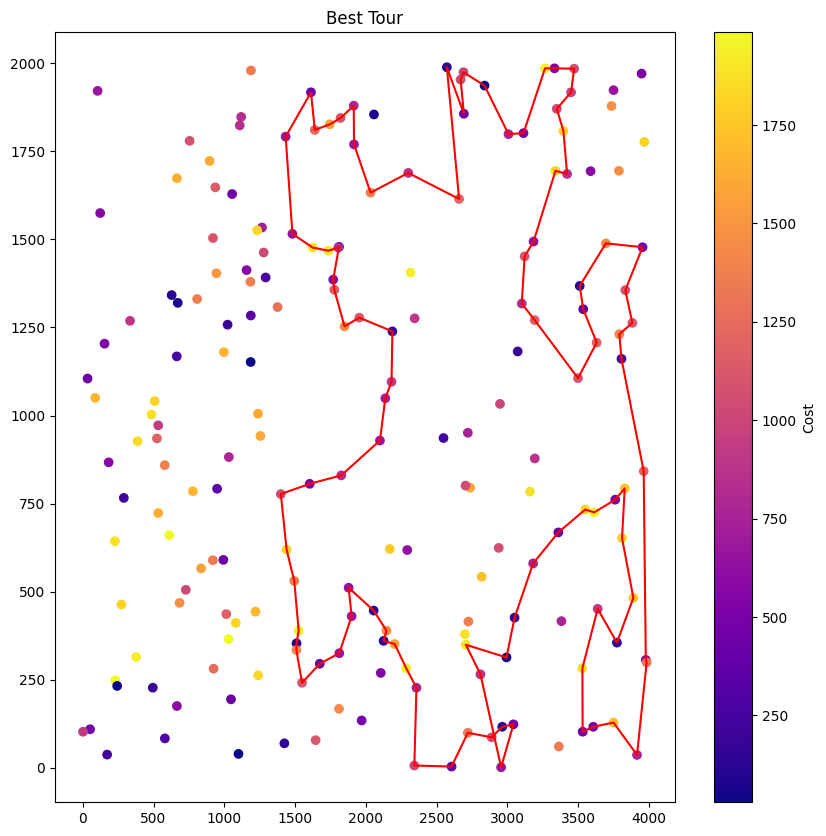

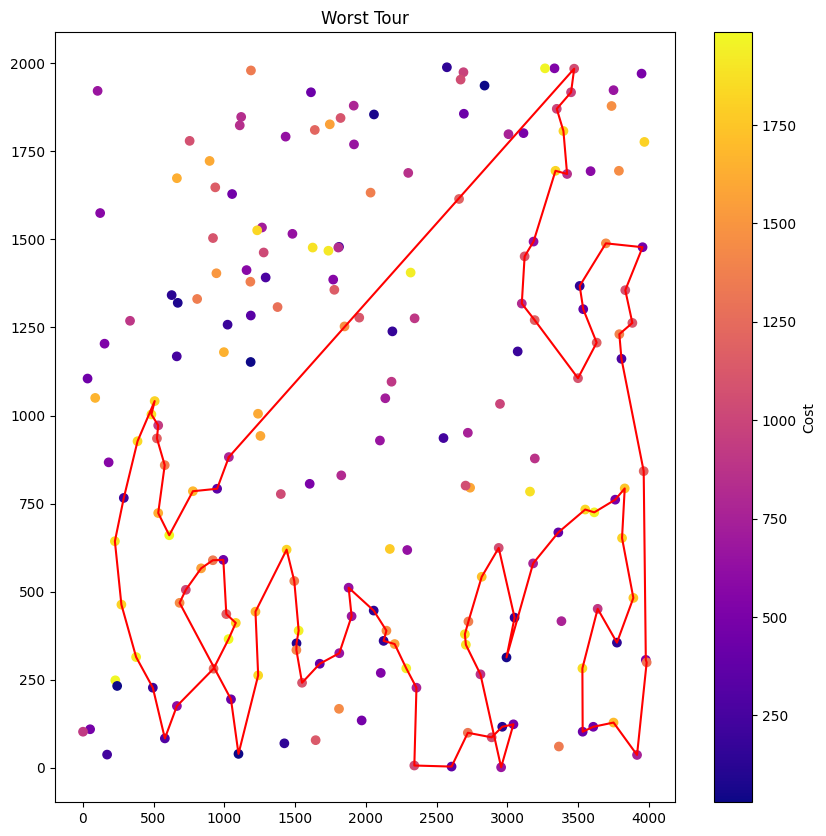

In [8]:
run_nn_exp("../data/TSPA.csv")

Best cost: 109047.0
Worst cost: 124759.0
Mean cost after 200 solutions: 116413.93


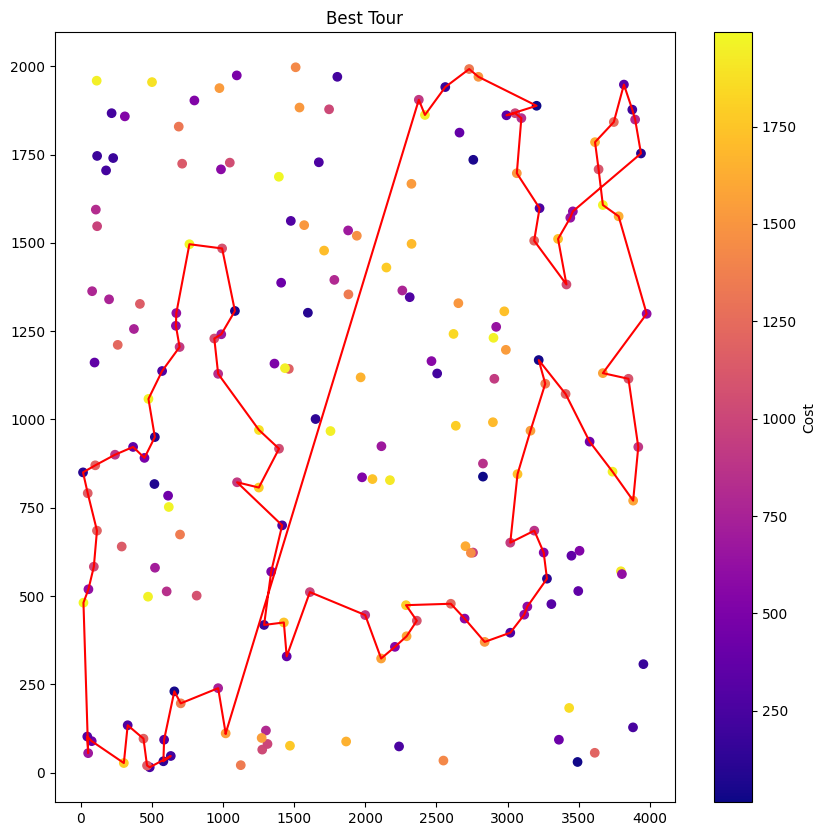

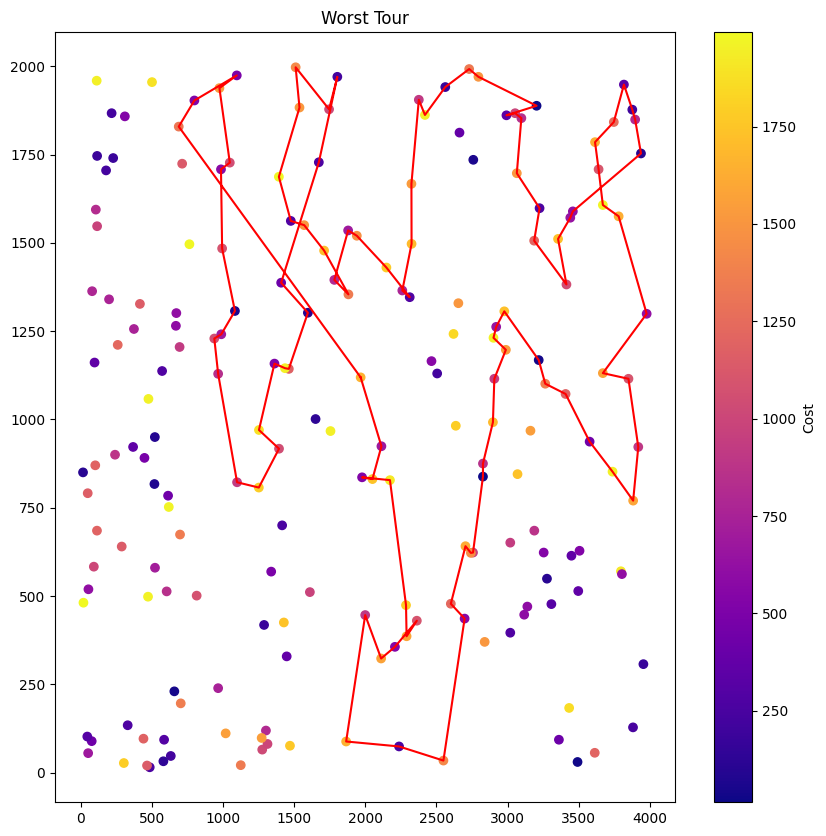

In [9]:
run_nn_exp("../data/TSPB.csv")

Best cost: 62629.0
Worst cost: 71814.0
Mean cost after 200 solutions: 66329.945


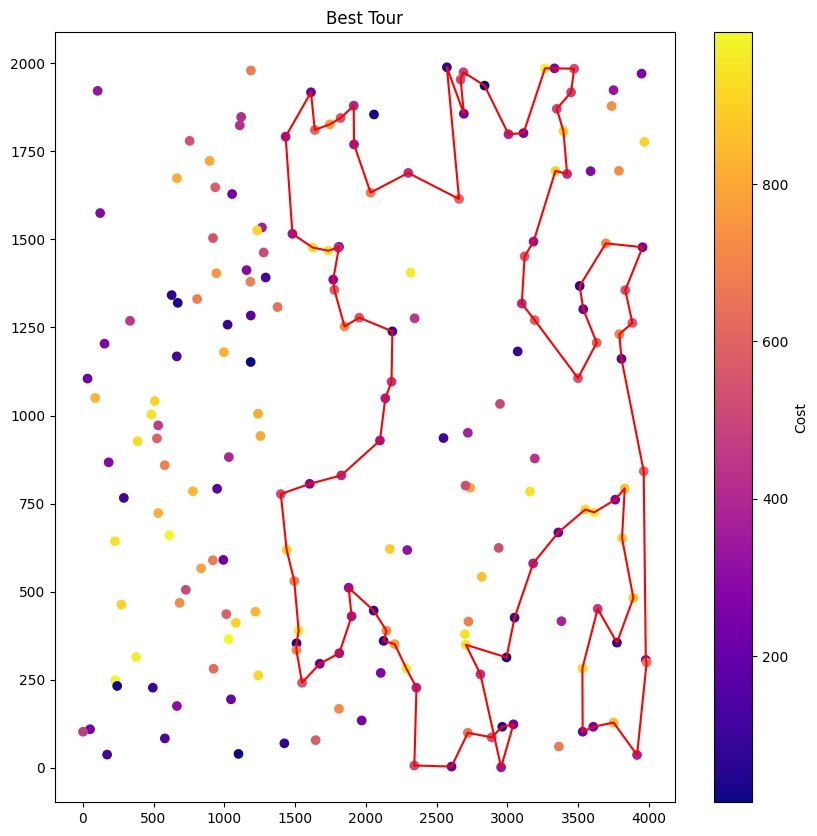

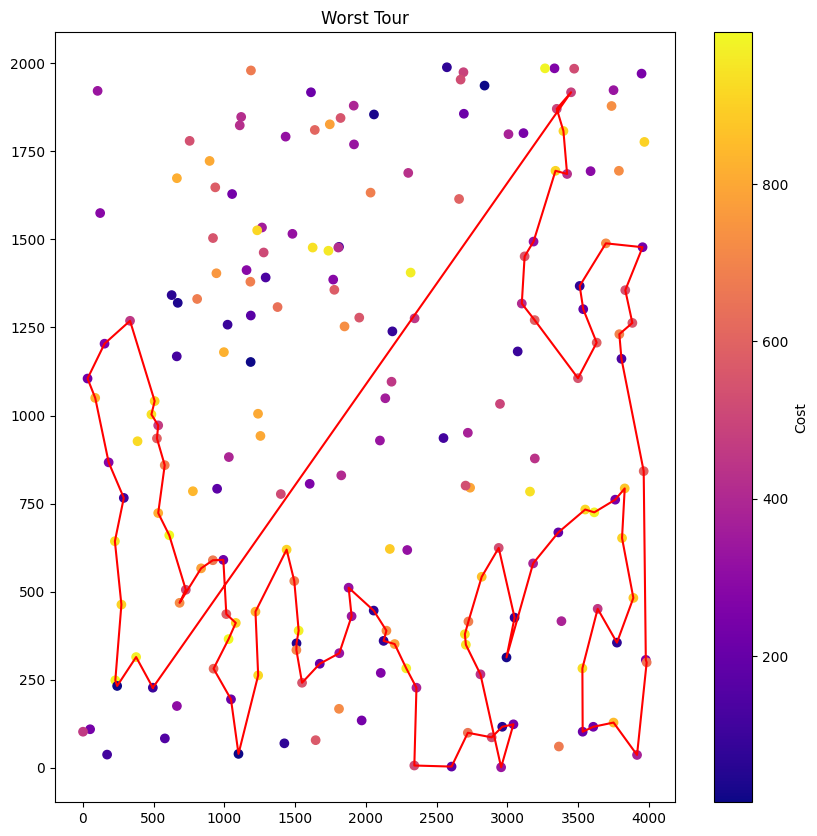

In [10]:
run_nn_exp("../data/TSPC.csv")

Best cost: 62967.0
Worst cost: 71396.0
Mean cost after 200 solutions: 67119.2


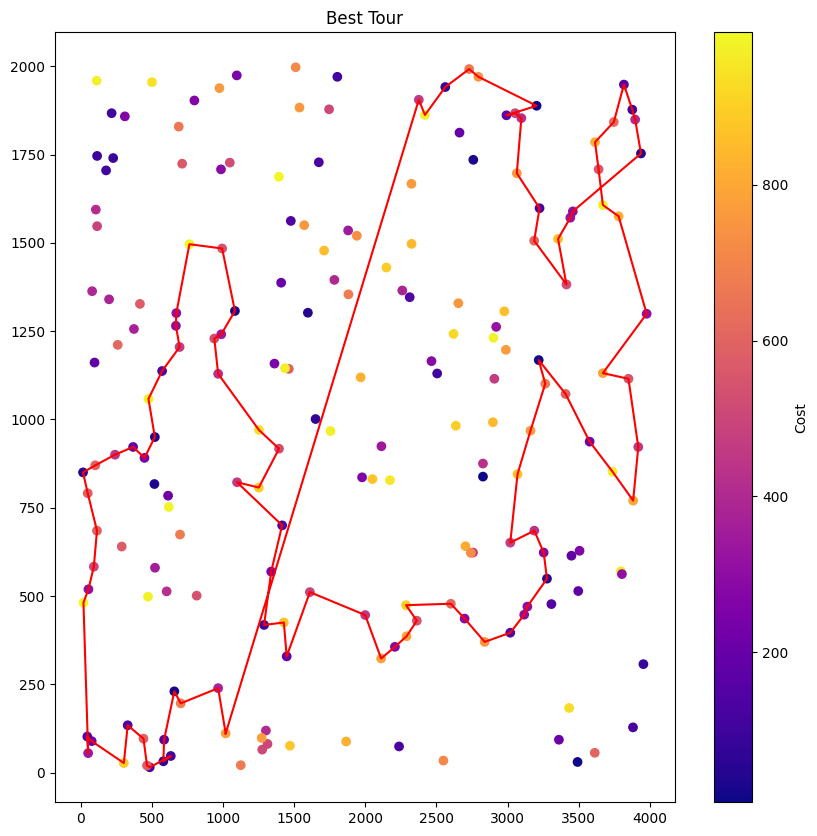

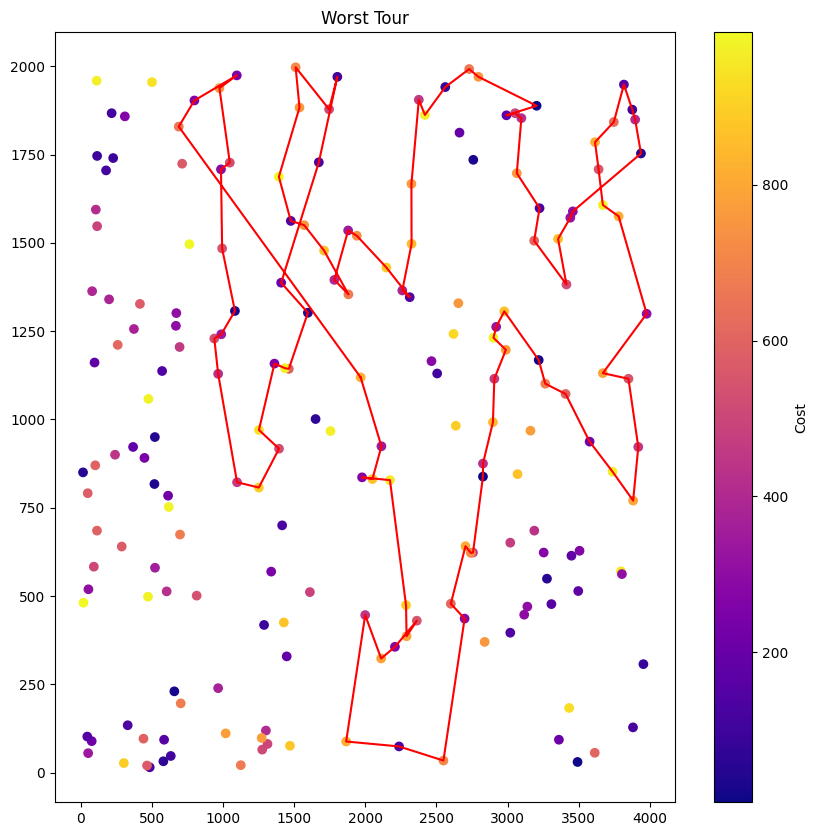

In [11]:
run_nn_exp("../data/TSPD.csv")

## GREEEDY CYCLE

#### PSEUDOCODE:

    function greedy_solution(dist_matrix, starting_vertex):  
    
        n <- round_up(number_of_all_vertices / 2)
        next_vertex <- argmin(dist_matrix[starting_vertex])

        temp_matrix = dist_matrix.copy()
        cycle = [starting_vertex, next_vertex]
        cost <- calculate_cost(cycle, dist_matrix)

        for _ in range(n-2):
            best_new_cost = inf
            best_new_cycle = cycle
    
            for i, v in enumerate(cycle):
            new_v = np.argmin(matrix[v])
            new_cycle = cycle[:i] + [new_v] + cycle[i:]            
            new_cost = calculate_cost(new_cycle, matrix_src)

            if new_cost < best_new_cost:
                best_new_cycle = new_cycle
                best_new_cost = new_cost
                chosen_v = new_v

            new_cycle = cycle[:i+1] + [new_v] + cycle[i+1:]       
            new_cost = calculate_cost(new_cycle, matrix_src)

            if new_cost < best_new_cost:
                best_new_cycle = new_cycle
                best_new_cost = new_cost
                chosen_v = new_v

            cycle = best_new_cycle
            cost = best_new_cost
            matrix[chosen_v, :] = np.inf
            matrix[:, chosen_v] = np.inf

        return cycle, cost
            

([164, 178, 0, 36, 132, 128, 37, 159, 143, 59, 147, 116, 27, 96, 64, 185, 20, 71, 181, 113, 163, 74, 195, 22, 101, 167, 112, 51, 135, 169, 95, 80, 8, 26, 119, 92, 48, 106, 160, 11, 152, 130, 109, 189, 75, 174, 1, 177, 137, 41, 199, 192, 175, 153, 127, 88, 45, 186, 170, 157, 21, 194, 79, 66, 94, 31, 72, 190, 98, 156, 172, 6, 24, 141, 87, 144, 154, 81, 171, 15, 108, 180, 32, 62, 53, 117, 55, 145, 76, 161, 91, 121, 114, 4, 77, 43, 50, 149, 69, 19], 79085.0)
Best cost: 76270.0
Worst cost: 84172.0
Mean cost after 200 solutions: 78871.415


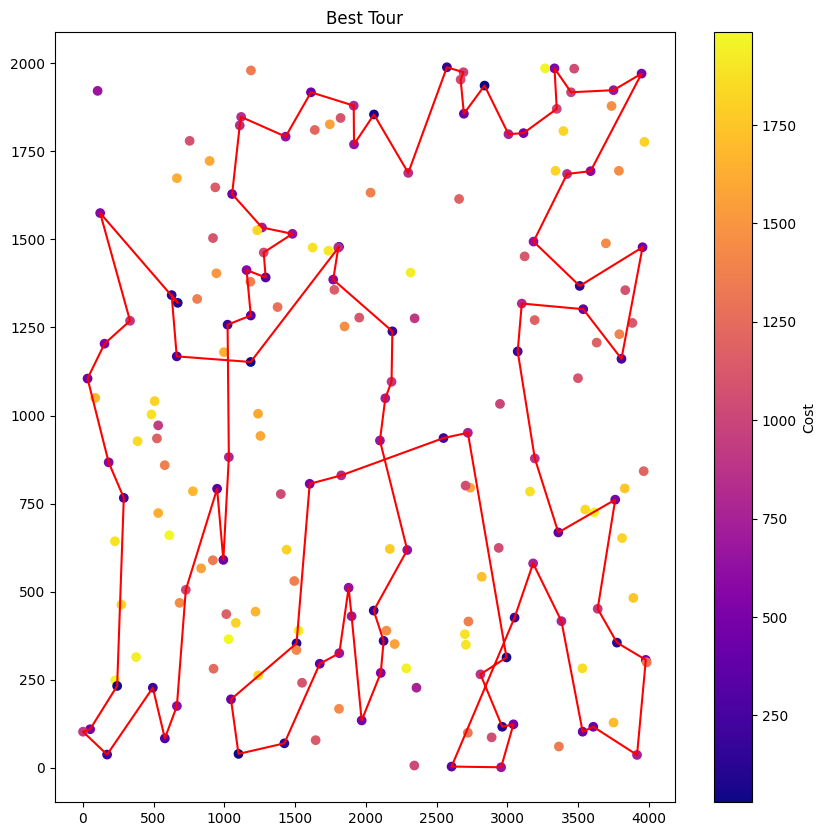

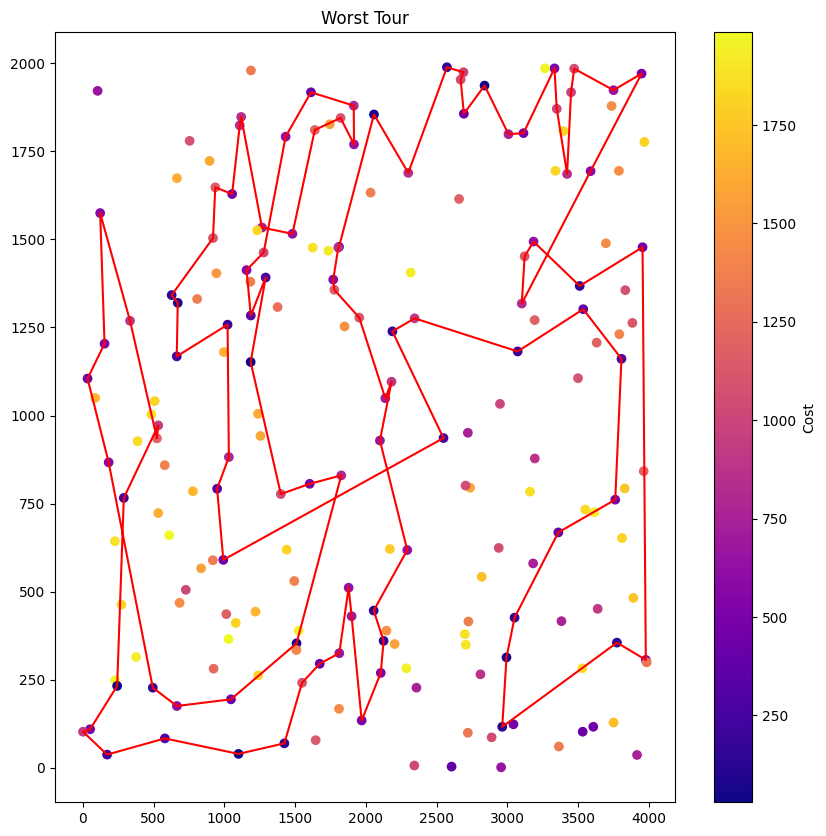

In [ ]:
run_greedy_experiment("../data/TSPA.csv")

([5, 34, 183, 197, 179, 31, 101, 42, 38, 103, 131, 121, 24, 127, 92, 26, 122, 143, 50, 43, 99, 102, 146, 137, 112, 154, 134, 25, 36, 194, 123, 165, 37, 88, 55, 4, 153, 80, 157, 79, 145, 95, 172, 16, 115, 82, 32, 113, 69, 53, 141, 148, 140, 188, 51, 91, 70, 174, 161, 130, 142, 21, 192, 117, 158, 3, 156, 67, 114, 162, 150, 44, 71, 59, 119, 196, 63, 8, 18, 132, 170, 189, 12, 107, 139, 52, 185, 73, 61, 136, 33, 29, 19, 190, 198, 135, 57, 0, 169, 66], 76496.0)
Best cost: 71970.0
Worst cost: 80491.0
Mean cost after 200 solutions: 75752.16


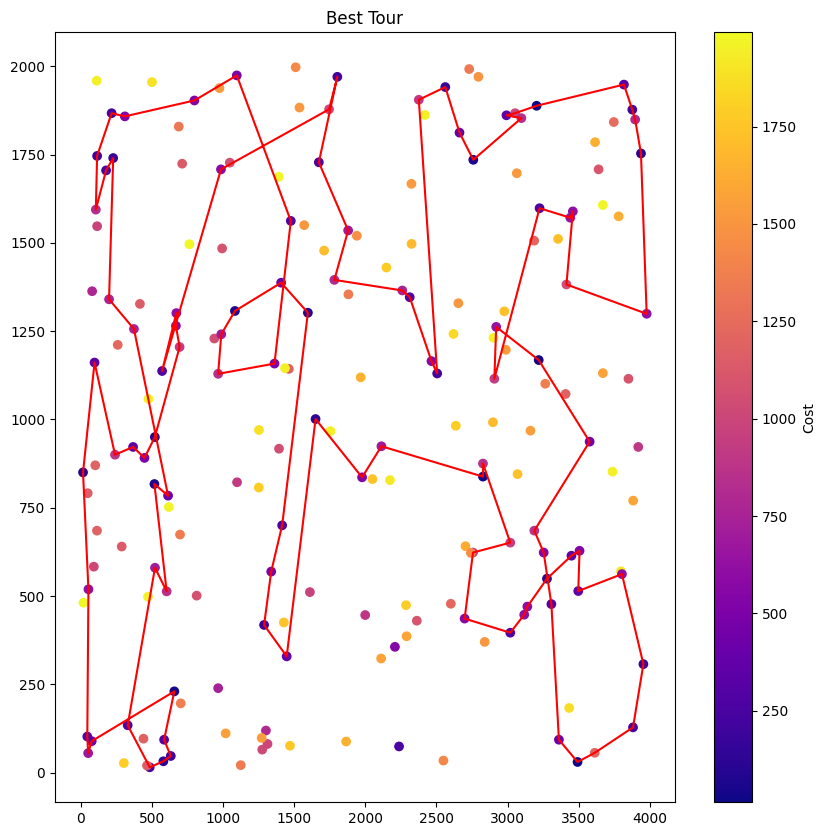

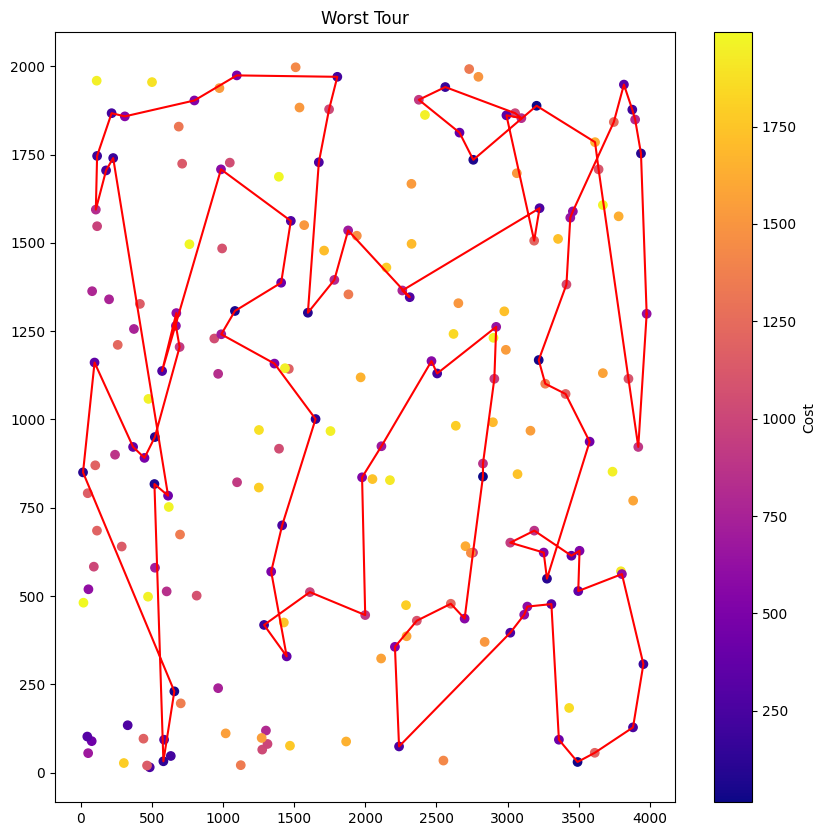

In [ ]:
run_greedy_experiment("../data/TSPB.csv")

([69, 35, 19, 164, 178, 115, 0, 145, 76, 161, 170, 157, 21, 194, 79, 28, 55, 36, 128, 132, 113, 163, 74, 195, 22, 53, 15, 117, 62, 108, 171, 81, 154, 133, 102, 87, 144, 141, 6, 98, 156, 172, 66, 24, 186, 45, 127, 88, 153, 91, 114, 43, 77, 167, 101, 60, 126, 109, 134, 119, 112, 5, 51, 135, 169, 95, 73, 31, 124, 80, 123, 105, 8, 125, 26, 92, 48, 106, 198, 160, 11, 152, 130, 189, 75, 1, 177, 137, 41, 174, 39, 199, 150, 192, 2, 4, 175, 121, 50, 149], 55029.0)
Best cost: 53614.0
Worst cost: 60247.0
Mean cost after 200 solutions: 56731.47


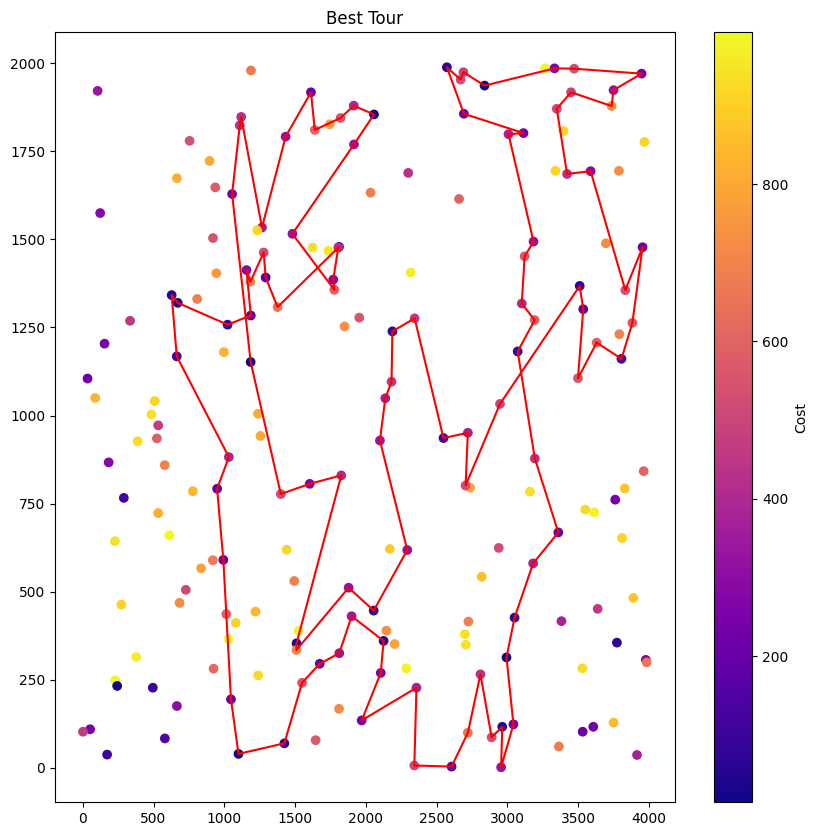

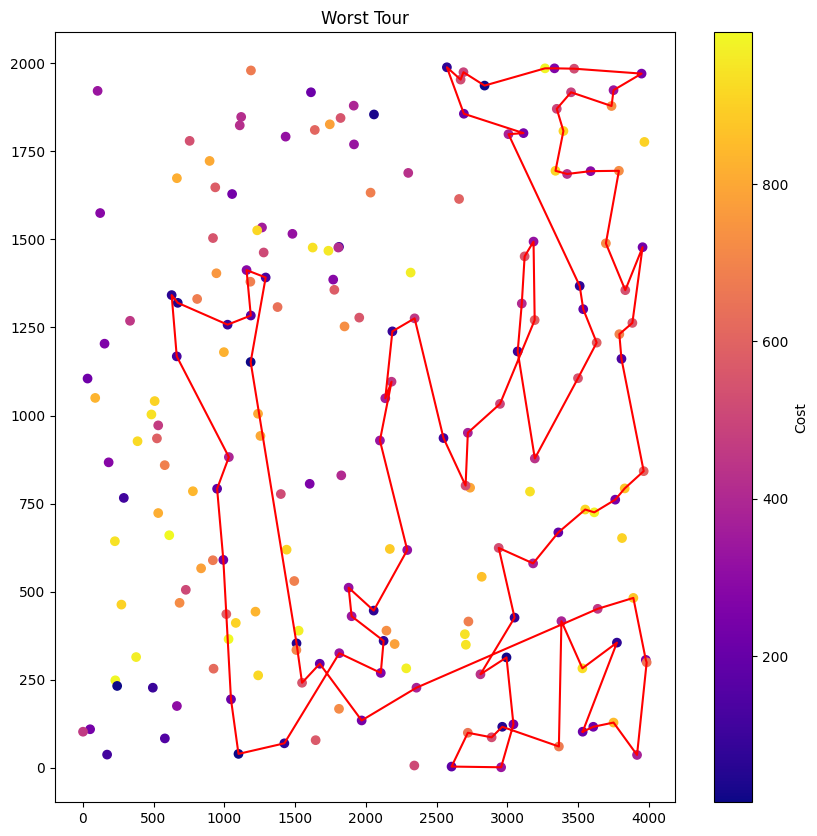

In [ ]:
run_greedy_experiment("../data/TSPC.csv")

([27, 111, 116, 99, 77, 57, 0, 178, 128, 5, 11, 34, 183, 197, 26, 92, 122, 179, 143, 121, 127, 24, 1, 31, 101, 42, 38, 103, 131, 125, 152, 94, 49, 50, 43, 102, 146, 137, 41, 37, 165, 68, 123, 23, 112, 154, 134, 25, 194, 36, 88, 55, 4, 153, 160, 180, 145, 79, 157, 80, 190, 19, 168, 29, 6, 33, 61, 136, 73, 185, 132, 139, 196, 117, 150, 162, 44, 114, 166, 71, 193, 119, 59, 97, 107, 12, 52, 65, 18, 16, 115, 82, 63, 8, 172, 95, 198, 135, 169, 66], 55364.0)
Best cost: 50639.0
Worst cost: 60031.0
Mean cost after 200 solutions: 54900.765


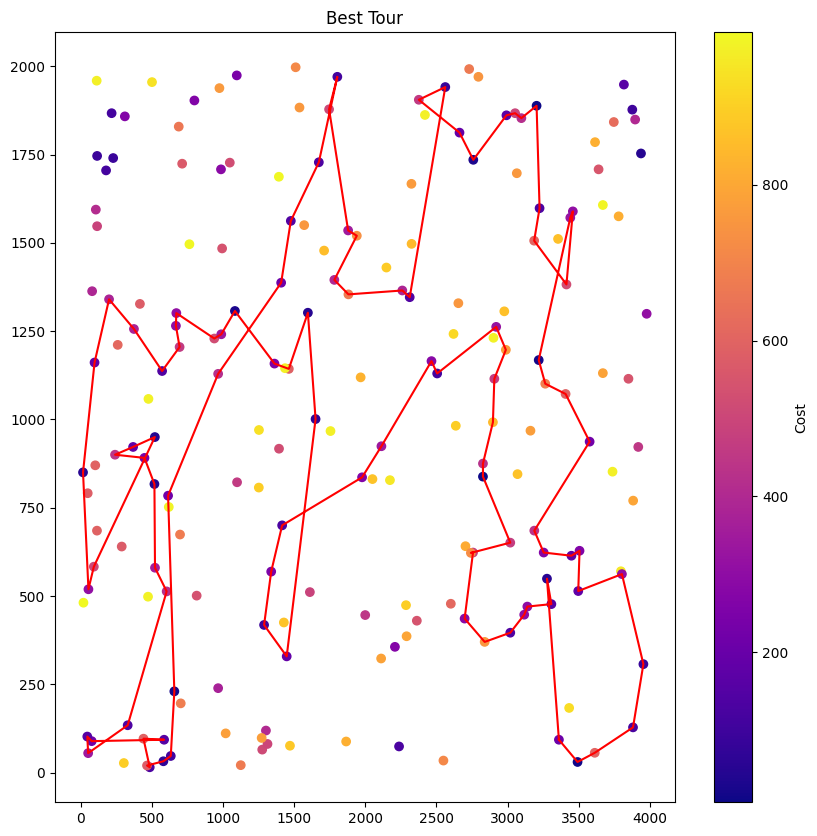

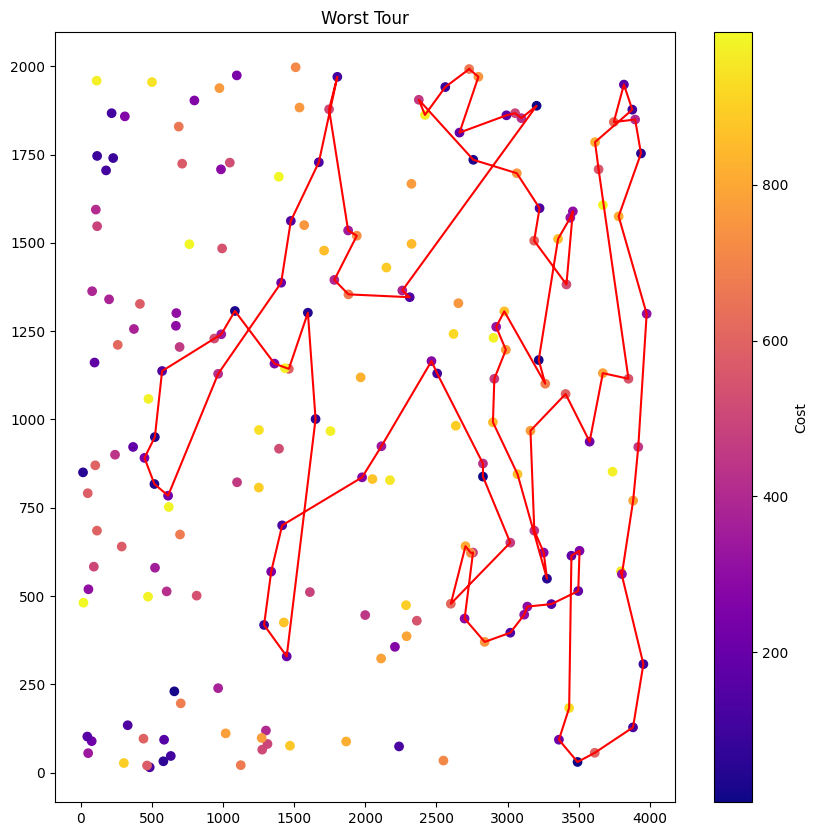

In [ ]:
run_greedy_experiment("../data/TSPD.csv")

## CONCLUSIONS:

### Results:

| Experiment | Algorithm  | MIN   | MAX   | AVG over 200   |
|-----------|----------|----------|----------|----------|
| TSPA    | RANDOM | 241153 | 298242 | 264750.185 |
| TSPA    | NEAREST_N  | 110035 | 125805 | 116516.55 |
| TSPA    | G_CYCLE  | 76270 | 84172 | 78871.415 |
|-----------|----------|----------|----------|----------|
| TSPB    | RANDOM | 240380 | 296499 | 266304.945 |
| TSPB    | NEAREST_N  | 109047 | 124759 | 116413.93 |
| TSPB    | G_CYCLE  | 71970 | 80491 | 75752.16 |
|-----------|----------|----------|----------|----------|
| TSPC    | RANDOM | 188548 | 239747 | 214950.675 |
| TSPC    | NEAREST_N  | 62629 | 71814 | 66329.945 |
| TSPC    | G_CYCLE  | 53614 | 60247 | 56731.47 |
|-----------|----------|----------|----------|----------|
| TSPD    | RANDOM  | 194917 | 246170 | 218555.1 |
| TSPD    | NEAREST_N  | 62967 | 71396 | 67119.2 |
| TSPD    | G_CYCLE  | 50639 | 60031 | 54900.765 |



1. Switching from random solution to nearest neighbour already gives us much better performance.
2. 
3.
